## Détéction des séctions



First, let's load the libraries we will use 

In [40]:
import moviepy.editor as mp
import librosa
import numpy as np                            
import matplotlib.pyplot as plt   
import librosa.display
from glob import glob
import pandas as pd

# 0 - Intro to Numpy

**Extraction du fichier audio**

In [94]:
# AudioExtract.py
clip_sample = mp.VideoFileClip("06-11-22.mp4").subclip(1, 50)
clip_sample.audio.write_audiofile("audio_sample.wav")

MoviePy - Writing audio in audio_sample.wav


MoviePy - Done.


In [95]:
audio_sample = 'audio_sample.wav'
x, sr = librosa.load(audio_sample)
print(x.shape)
print(sr)

(1080450,)
22050


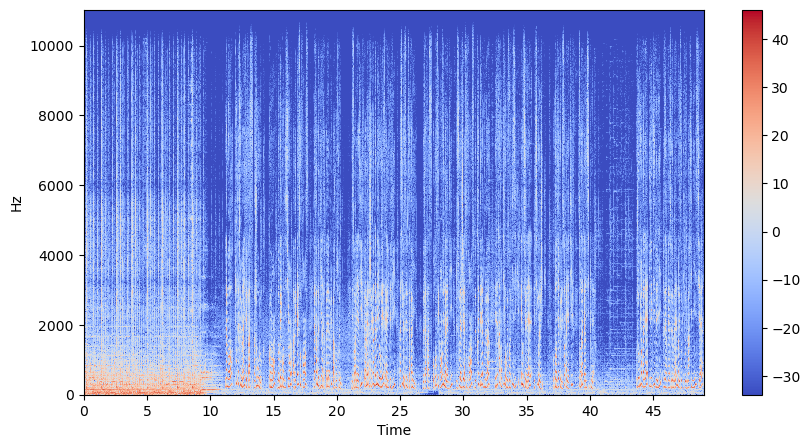

In [96]:
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize = (10, 5))
librosa.display.specshow(Xdb, sr = sr, x_axis = 'time', y_axis = 'hz')
plt.colorbar()

 **Objet**: Display a spectrogram using librosa.display.specshow:

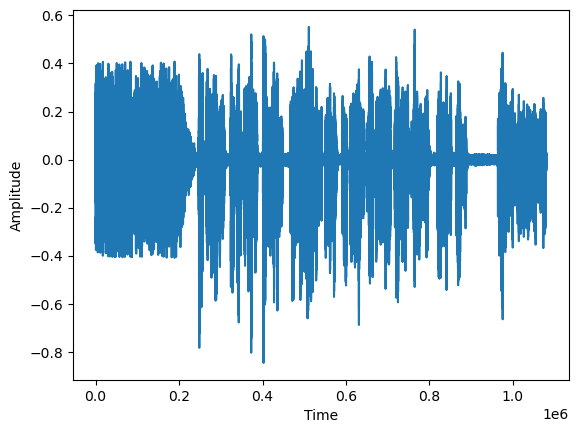

In [97]:
plt.plot(x)
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()

(13, 2111)
[[-1.37895996e+02 -1.44624680e+02 -1.58508698e+02 ... -3.04725739e+02
  -3.31268005e+02 -3.58885223e+02]
 [ 1.38773315e+02  1.70254196e+02  1.94853226e+02 ...  1.15962364e+02
   1.11195518e+02  1.19959633e+02]
 [ 1.38402538e+01  9.27656174e+00 -9.04583454e+00 ... -4.47731447e+00
   8.62341022e+00  2.04888039e+01]
 ...
 [ 5.47121048e-01  3.26394200e-01 -2.79526901e+00 ... -8.16863918e+00
  -9.51597977e+00 -1.36658039e+01]
 [ 1.10200729e+01  1.53721142e+01  1.72405891e+01 ... -7.09860039e+00
   5.11951256e+00 -3.38529348e-02]
 [ 3.84681773e+00 -1.20767045e+00 -6.13292122e+00 ...  1.83691680e+00
   1.14609489e+01  1.29594221e+01]]
(1080450,)
[-0.24196737 -0.34946245 -0.28731447 ... -0.01125295 -0.00979199
 -0.0081691 ]


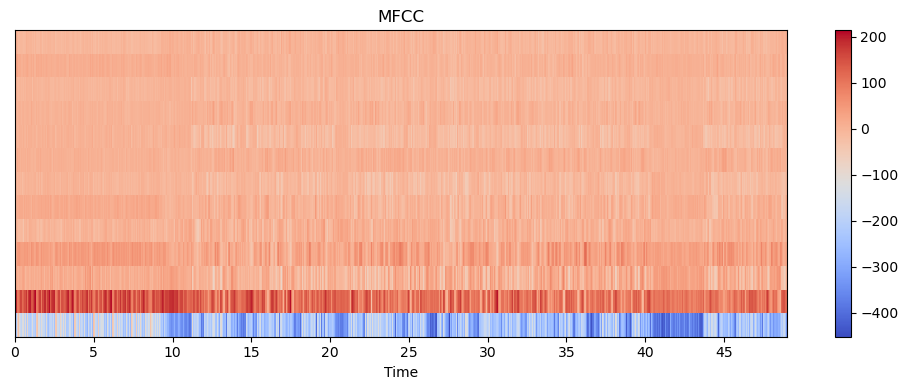

In [98]:
y, sr = librosa.load(audio_sample)
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)

print (mfccs.shape)
print (y.shape)

plt.figure(figsize=(10,4))
librosa.display.specshow(mfccs, x_axis="time")
plt.colorbar()
plt.title('MFCC')
plt.tight_layout()
plt.show()


In [141]:
# AudioExtract.py
clip_all = mp.VideoFileClip("06-11-22.mp4")
clip_all.audio.write_audiofile("audio_all.wav")

audio_all = 'audio_all.wav'


MoviePy - Writing audio in audio_all.wav


MoviePy - Done.


In [183]:
audio, sample_rate = librosa.load(audio_all)
print(sample_rate)
# librosa
hop_length = int(sample_rate/100) 
n_fft = int(sample_rate/40)
features_librosa = librosa.feature.mfcc(audio, sample_rate, n_mfcc=20, hop_length=hop_length, n_fft=n_fft)

number_of_frames = 22050 / hop_length 
frame_rate = sample_rate / hop_length 
print(features_librosa.shape)

22050
(20, 235623)


In [213]:
# Définissons les noms des colonnes
column_names = ['mfcc1', 'mfcc2', 'mfcc3','mfcc4', 'mfcc5', 'mfcc6', 'mfcc7', 'mfcc8', 'mfcc9','mfcc10'
                ,'mfcc11','mfcc12','mfcc13','mfcc14', 'mfcc15', 'mfcc16', 'mfcc17', 'mfcc18', 'mfcc19', 'mfcc20']
# Création d'un dataframe
df = pd.DataFrame(features_librosa.T,columns = column_names)

df['second'] = 0
df['_2second'] = 0
for index in range(len(df)):
    df['second'].loc[index] = int(index / frame_rate) + 1
    df['_2second'].loc[index] = int((int(index / frame_rate))/2) + 1
    
print(df)


             mfcc1      mfcc2      mfcc3      mfcc4      mfcc5      mfcc6  \
0      -473.236298  64.375587   9.555140  -7.511919 -10.282475   4.321068   
1      -429.546814  82.273125   4.668760 -19.317062 -27.955931   4.538897   
2      -424.952789  83.757484   1.562939  -7.532064 -13.087639   4.660577   
3      -438.430634  78.756477   4.536062   0.544748  -3.380537  14.535448   
4      -433.187927  96.660271  14.371687  -0.562946 -10.425617   3.912463   
...            ...        ...        ...        ...        ...        ...   
235618 -586.920715   0.000000   0.000000   0.000000   0.000000   0.000000   
235619 -586.920715   0.000000   0.000000   0.000000   0.000000   0.000000   
235620 -586.920715   0.000000   0.000000   0.000000   0.000000   0.000000   
235621 -586.920715   0.000000   0.000000   0.000000   0.000000   0.000000   
235622 -586.920715   0.000000   0.000000   0.000000   0.000000   0.000000   

           mfcc7      mfcc8      mfcc9     mfcc10  ...     mfcc13    mfcc14

Text(0.5, -0.15, 'Matrice de corrélation')

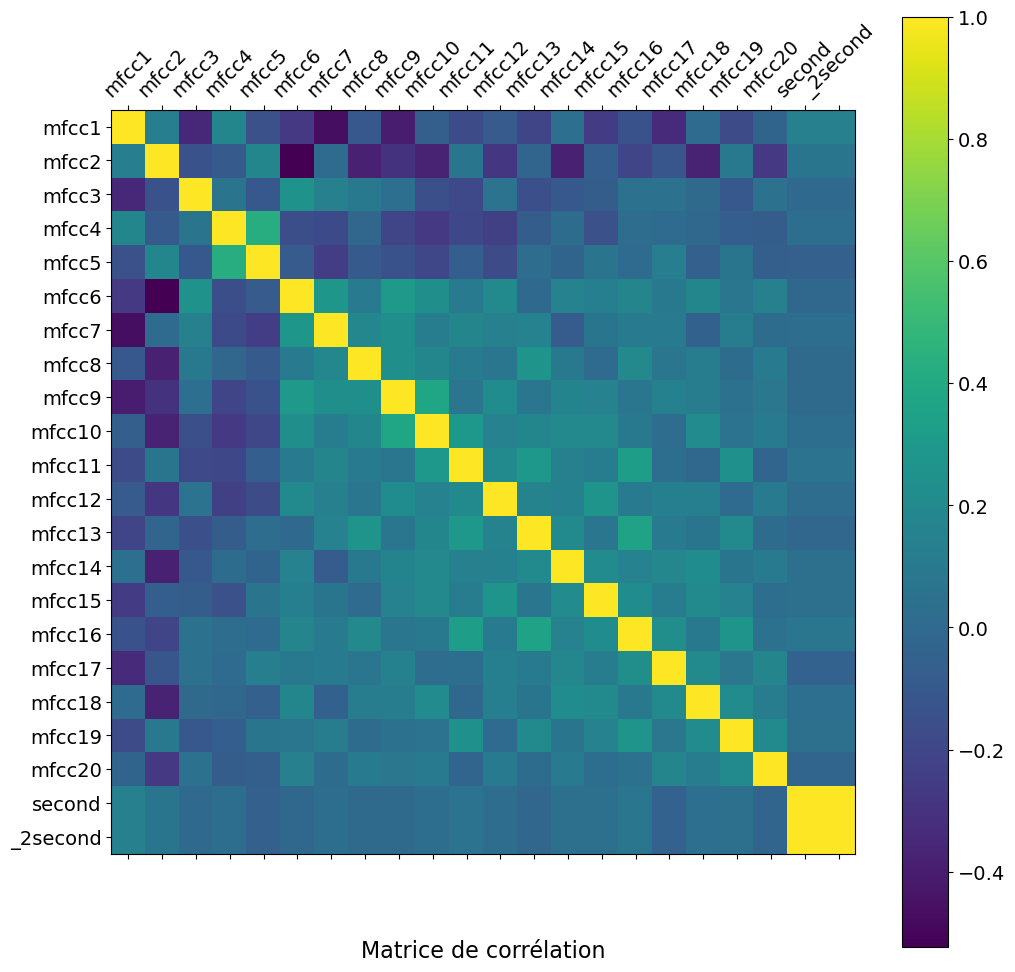

In [215]:
f = plt.figure(figsize=(12, 12))

plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.shape[1]), df.columns, fontsize=14, rotation=45)
plt.yticks(range(df.shape[1]), df.columns, fontsize=14)

cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Matrice de corrélation', fontsize=16, y=-0.15)

0     -4.371310
1     -2.376668
2     -2.947680
3     -2.912339
4     -3.404573
5     -7.775504
6    -13.385640
7    -13.558388
8    -14.304949
9    -14.479968
10   -13.629565
11   -13.716756
12   -14.614841
13   -14.251973
14   -17.733913
15   -13.868027
16   -14.166021
17   -14.679112
18   -14.424917
19   -14.168335
20   -14.277418
21   -14.616786
22   -14.681849
23   -14.409105
24   -14.080696
25   -14.043152
26   -13.870465
27   -14.798326
28   -14.895569
29   -14.383962
Name: Mean_MFCC, dtype: float32
1146   -12.734892
1147   -11.350279
1148    -8.739112
1149    -9.505583
1150    -9.540732
1151    -9.624372
1152    -9.797486
1153    -9.291928
1154    -9.557300
1155    -9.669702
1156    -9.384362
1157    -9.564508
1158    -9.935222
1159    -9.127428
1160   -10.778849
1161   -10.744073
1162    -9.009310
1163    -9.012458
1164   -10.456522
1165   -11.909582
1166   -14.230293
1167   -12.083471
1168   -11.787992
1169   -12.094567
1170    -6.017233
1171    -2.261789
1172    -3.021270
11

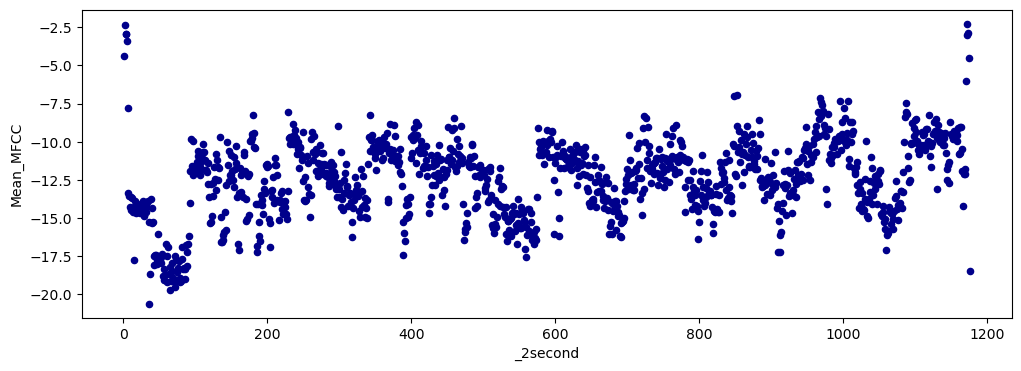

In [219]:
df_2=df.groupby('_2second').mean().reset_index()
df_2=df_2.drop(['second'], axis=1)

df_2['Mean_MFCC']=df_2.iloc[:,1:21].mean(axis=1)

print(df_2["Mean_MFCC"].head(30))
print(df_2["Mean_MFCC"].tail(30))

ax1 = df_2.plot.scatter(x='_2second',y='Mean_MFCC',c='DarkBlue', figsize=(12,4))

